<a href="https://colab.research.google.com/github/ecribbie/6912_PROJECT/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
!git clone https://github.com/ecribbie/6912_PROJECT.git
%cd ./6912_PROJECT/

Cloning into '6912_PROJECT'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 115 (delta 27), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (115/115), 6.02 MiB | 9.08 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/6912_PROJECT


## Read data

In [ ]:
data_original=pd.read_excel("default of credit card clients.xls")
data_original.head()
#do not touch this dataset, a copy is made into dat to use (it is the one that is cleaned below)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## Clean data

In [ ]:
dat=data_original.copy()
# Remove id column
dat.drop(dat.columns[0], axis=1, inplace=True)

# Dict of column names to definition
labels_to_variable = {}
for idx, column in enumerate(dat.columns):
    labels_to_variable[column]=dat.iloc[0, idx]
print(labels_to_variable)

# Remove the first row (labels)
dat = dat.iloc[1:]

# Reset index after removing the first row
dat.reset_index(drop=True, inplace=True)
dat.head()

{'X1': 'LIMIT_BAL', 'X2': 'SEX', 'X3': 'EDUCATION', 'X4': 'MARRIAGE', 'X5': 'AGE', 'X6': 'PAY_0', 'X7': 'PAY_2', 'X8': 'PAY_3', 'X9': 'PAY_4', 'X10': 'PAY_5', 'X11': 'PAY_6', 'X12': 'BILL_AMT1', 'X13': 'BILL_AMT2', 'X14': 'BILL_AMT3', 'X15': 'BILL_AMT4', 'X16': 'BILL_AMT5', 'X17': 'BILL_AMT6', 'X18': 'PAY_AMT1', 'X19': 'PAY_AMT2', 'X20': 'PAY_AMT3', 'X21': 'PAY_AMT4', 'X22': 'PAY_AMT5', 'X23': 'PAY_AMT6', 'Y': 'default payment next month'}


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data splitting and scaling

In [ ]:
# SPlit data into predictors and response
X = dat.iloc[:, :23]
Y = dat.iloc[:, 23]
Y=Y.astype(int)

# Splitting the data into training and testing
X_train_pre, X_test_pre, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_pre)
X_test = scaler.transform(X_test_pre)


# SMOTE and Undersampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

minority_class_count = np.sum(Y_train == 1)
majority_class_count = np.sum(Y_train == 0)

# Calculate desired number of samples for minority class to achieve 0.5 ratio
desired_minority_samples = int(minority_class_count * 1.2)
# Calculate desired number of samples for majority class to achieve 0.5 ratio
desired_majority_samples = int(desired_minority_samples * 2)

# Create SMOTE and RandomUnderSampler objects with specified sampling strategies
smote = SMOTE(sampling_strategy={1: desired_minority_samples},random_state=42)
undersample = RandomUnderSampler(sampling_strategy={0: desired_majority_samples},random_state=42)

# Creating a pipeline with SMOTE and undersampling
pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersample)
])

# Applying the pipeline to the training data only
X_train, Y_train = pipeline.fit_resample(X_train, Y_train)

In [ ]:
from collections import Counter

# Counting unique values
Counter(Y_train)

Counter({0: 12774, 1: 6387})

# Logistic Regression

In [ ]:
Y.astype(int)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64

In [ ]:
# Initialize the logistic regression model
log_reg = LogisticRegression(penalty='l1',C=.08,solver='liblinear')
log_reg = LogisticRegression(C=.004,penalty='elasticnet',solver='saga',l1_ratio=0.8)

# Fit the model on the training data
log_reg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = log_reg.predict(X_test)
Y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8121666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4687
           1       0.61      0.39      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



In [ ]:
from scipy.stats import norm
coef = log_reg.coef_.reshape(-1)  # Coefficients
std_err = np.std(X_train, 0) * np.sqrt((1 / (len(Y_train) - 1)) + (1 / len(Y_train)))  # Standard errors

# Compute z-scores and p-values
z_scores = coef / std_err
p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

# Get column names of X_train
column_names = [f'feature_{i+1}' for i in range(X_train.shape[1])]

# Create DataFrame for summary
summary_df = pd.DataFrame({'Coefficient': coef, 'Standard Error': std_err, 'Z-score': z_scores, 'P-value': p_values},
                          index=column_names)

# Print summary
print(summary_df)

# Compute confidence intervals
conf_int = [(coef - 1.96 * std_err, coef + 1.96 * std_err) for coef, std_err in zip(coef, std_err)]

# Print confidence intervals
print("\nConfidence intervals:")
for i, (lower, upper) in enumerate(conf_int):
    print(f"Feature {i+1}: ({lower}, {upper})")

            Coefficient  Standard Error    Z-score       P-value
feature_1     -0.102389        0.010072 -10.165990  0.000000e+00
feature_2     -0.015068        0.010235  -1.472173  1.409742e-01
feature_3      0.000000        0.010096   0.000000  1.000000e+00
feature_4     -0.035115        0.010216  -3.437283  5.875818e-04
feature_5      0.019617        0.010255   1.912961  5.575305e-02
feature_6      0.584522        0.010803  54.108963  0.000000e+00
feature_7      0.121762        0.010755  11.321034  0.000000e+00
feature_8      0.064540        0.010749   6.004055  1.924491e-09
feature_9      0.033387        0.010825   3.084349  2.039979e-03
feature_10     0.000000        0.010816   0.000000  1.000000e+00
feature_11     0.000000        0.010754   0.000000  1.000000e+00
feature_12    -0.099546        0.010122  -9.834855  0.000000e+00
feature_13     0.000000        0.010148   0.000000  1.000000e+00
feature_14     0.000000        0.010178   0.000000  1.000000e+00
feature_15     0.000000  

In [ ]:
coefficients = log_reg.coef_[0]  # Coefficients for the standardized variables
sigma = scaler.scale_  # Standard deviation of the original variables

# Compute the coefficients for the original scale
coeffs_original=coefficients / sigma
print(coeffs_original)
# Compute the odds ratio for the original scale
odds_ratio_original = np.exp(coeffs_original)
print("Odds Ratios (Original Scale):", odds_ratio_original)

[-7.89233153e-07 -3.08217324e-02  0.00000000e+00 -6.71734437e-02
  2.12423653e-03  5.18906570e-01  1.01667827e-01  5.41595392e-02
  2.85829836e-02  0.00000000e+00  0.00000000e+00 -1.35623202e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.98083152e-06 -1.61539649e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.93807791e-07]
Odds Ratios (Original Scale): [0.99999921 0.96964841 1.         0.93503301 1.00212649 1.68018948
 1.10701569 1.05565301 1.0289954  1.         1.         0.99999864
 1.         1.         1.         1.         1.         0.99999602
 0.99999838 1.         1.         1.         0.99999981]


In [ ]:
# Compute limit odds ratio for 10000$ increase
np.exp(10000*-7.89167181e-07)

0.992139385679773

In [ ]:
# Compute age odds ratio for 10 year increase
np.exp(10*2.12412852e-03)

1.021468487133926

In [ ]:
# Predict total default amount on entire test data
cutoff=0.35
response=Y_test
predictor=X_test_pre
scaled_predictor=scaler.fit_transform(predictor)
predicted_response=(log_reg.predict_proba(scaled_predictor)[:,1] >= cutoff).astype(int)
print("Error percentage:")
(sum(response*predictor['X1'])-sum(predicted_response*predictor['X1']))/sum(response*predictor['X1'])

Error percentage:


0.05483255249002256

In [ ]:
# Create subsamples of test for testing
X_samp_1, X_samp_2, Y_samp_1, Y_samp_2 = train_test_split(X_test_pre, Y_test, test_size=0.5, random_state=42)
X_samp_3, X_samp_4, Y_samp_3, Y_samp_4 = train_test_split(X, Y, test_size=0.5, random_state=42)

In [ ]:
# Predict total default amount
cutoff=0.35
response=Y_samp_1
predictor=X_samp_1
scaled_predictor=scaler.fit_transform(predictor)
predicted_response=(log_reg.predict_proba(scaled_predictor)[:,1] >= cutoff).astype(int)
print("Error percentage:")
(sum(response*predictor['X1'])-sum(predicted_response*predictor['X1']))/sum(response*predictor['X1'])

Error percentage:


0.03936479534779691

In [ ]:
# Predict total default amount
cutoff=0.35
response=Y_samp_2
predictor=X_samp_2
scaled_predictor=scaler.fit_transform(predictor)
predicted_response=(log_reg.predict_proba(scaled_predictor)[:,1] >= cutoff).astype(int)
print("Error percentage:")
(sum(response*predictor['X1'])-sum(predicted_response*predictor['X1']))/sum(response*predictor['X1'])

Error percentage:


0.0731999520785911

# KNN Classification

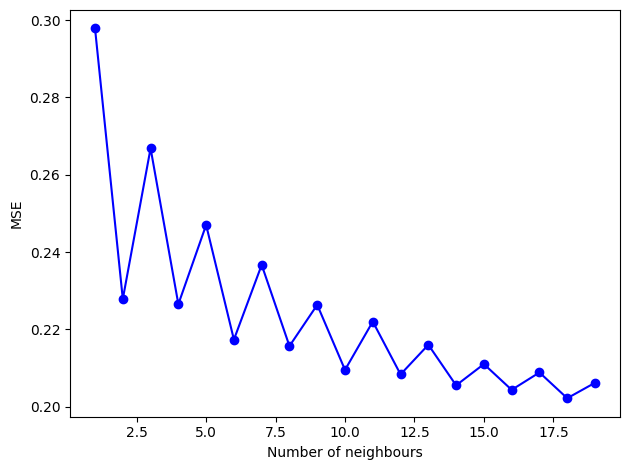

Accuracy using KNN: 0.778

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4687
           1       0.49      0.46      0.48      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.66      0.67      6000
weighted avg       0.77      0.78      0.78      6000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Elbow method to get the optimal number of Neighbours
mse = {}
for i in range(1, 20):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, Y_train)
  Y_knn_preds = knn_model.predict(X_test)
  mse[i] = mean_squared_error(Y_test, Y_knn_preds)
  # rmse[i] = sqrt(mse)
  # print("n = " + str(i) + " : " + str(mse[i]))


# Plot the figure
fig = plt.figure()
plt.plot(mse.keys(), mse.values(), '-bo')
plt.xlabel('Number of neighbours')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

# Initiate a KNN Classifier model with 3 neighbours
k = 11
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Make predictions using the test data
Y_knn_preds = knn_model.predict(X_test)

# Evaluate the Kmeans model
accuracy = accuracy_score(Y_test, Y_knn_preds)
print("Accuracy using KNN:", accuracy)

# Print classification report
print("\nClassification Report for KNN:")
print(classification_report(Y_test, Y_knn_preds))

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_curve, auc, average_precision_score
import math

[Text(0.6, 0.9, 'X6 <= 0.905\nentropy = 0.918\nsamples = 19161\nvalue = [12774, 6387]'),
 Text(0.4, 0.7, 'X7 <= 0.163\nentropy = 0.82\nsamples = 16462\nvalue = [12251, 4211]'),
 Text(0.2, 0.5, 'X20 <= -0.242\nentropy = 0.767\nsamples = 14880\nvalue = [11551, 3329]'),
 Text(0.1, 0.3, 'X12 <= -0.677\nentropy = 0.899\nsamples = 4635\nvalue = [3176, 1459]'),
 Text(0.05, 0.1, 'entropy = 0.958\nsamples = 2123\nvalue = [1317, 806]'),
 Text(0.15, 0.1, 'entropy = 0.827\nsamples = 2512\nvalue = [1859, 653]'),
 Text(0.3, 0.3, 'X1 <= -0.134\nentropy = 0.686\nsamples = 10245\nvalue = [8375, 1870]'),
 Text(0.25, 0.1, 'entropy = 0.784\nsamples = 4781\nvalue = [3666, 1115]'),
 Text(0.35, 0.1, 'entropy = 0.579\nsamples = 5464\nvalue = [4709, 755]'),
 Text(0.6, 0.5, 'X11 <= 0.562\nentropy = 0.99\nsamples = 1582\nvalue = [700, 882]'),
 Text(0.5, 0.3, 'X20 <= -0.213\nentropy = 0.999\nsamples = 1101\nvalue = [534, 567]'),
 Text(0.45, 0.1, 'entropy = 0.984\nsamples = 610\nvalue = [260, 350]'),
 Text(0.55, 0

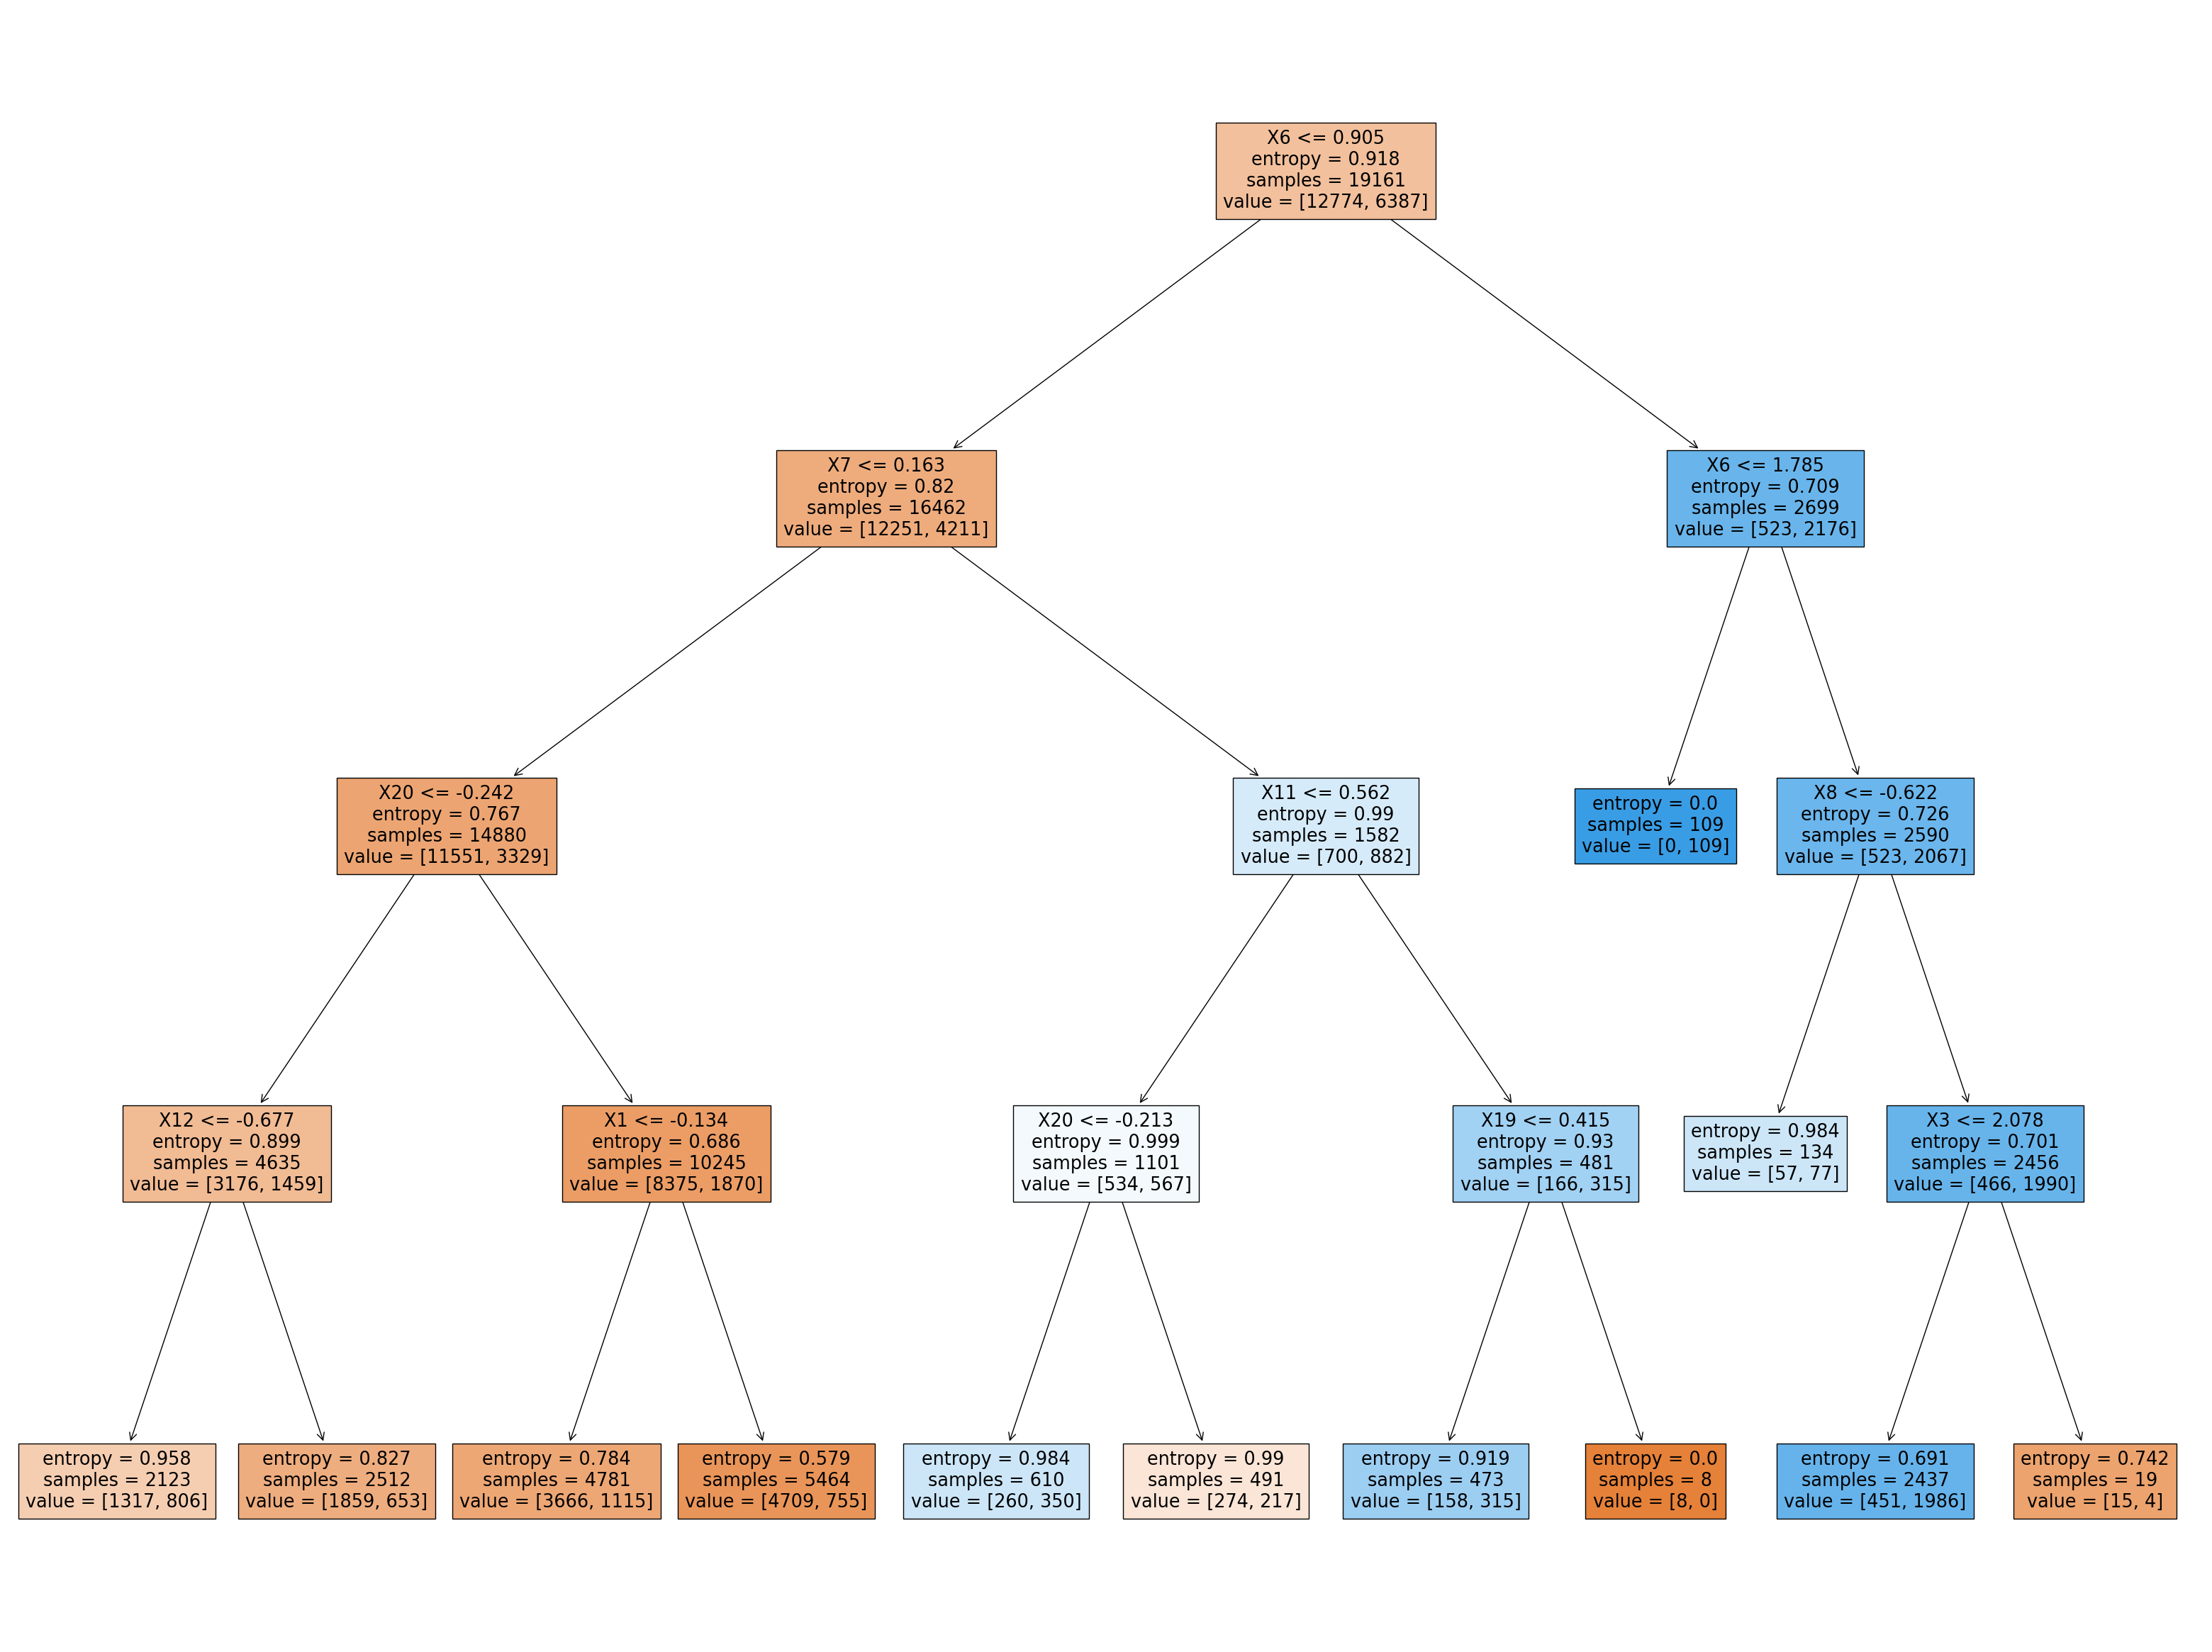

In [ ]:
X_train_pre.columns
pred = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=200, random_state=0)
pred.fit(X_train, Y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(pred, filled=True, feature_names=list(X_train_pre.columns), proportion=False)

In [ ]:
def test_decision_tree(X_train, y_train, X_test, Y_test, max_depth, min_samples_split):
    #Trained Decision Tree model
    pred = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
    pred.fit(X_train, Y_train)

    #Predicted test set
    Y_pred_test = pred.predict(X_test)
    mse_test = mean_squared_error(Y_pred_test, Y_test)
    rmse_test = math.sqrt(mse_test)
    print(f"RMSE for test set with max_depth={max_depth} and min_samples_split={min_samples_split}: {rmse_test}")

In [ ]:
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=2, min_samples_split=200)
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=4, min_samples_split=200)
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=3, min_samples_split=100)
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=3, min_samples_split=500)

RMSE for test set with max_depth=2 and min_samples_split=200: 0.44422216663887154
RMSE for test set with max_depth=4 and min_samples_split=200: 0.43204937989385733
RMSE for test set with max_depth=3 and min_samples_split=100: 0.44422216663887154
RMSE for test set with max_depth=3 and min_samples_split=500: 0.44422216663887154


In [ ]:
print("Accuracy:", accuracy_score(Y_test, pred.predict(X_test)))
# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, pred.predict(X_test)))

Accuracy: 0.8133333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4687
           1       0.61      0.42      0.49      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.67      0.69      6000
weighted avg       0.80      0.81      0.80      6000



# Random forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)
# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions))

Accuracy: 0.8071666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4687
           1       0.57      0.46      0.51      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.68      0.70      6000
weighted avg       0.80      0.81      0.80      6000



## ROC

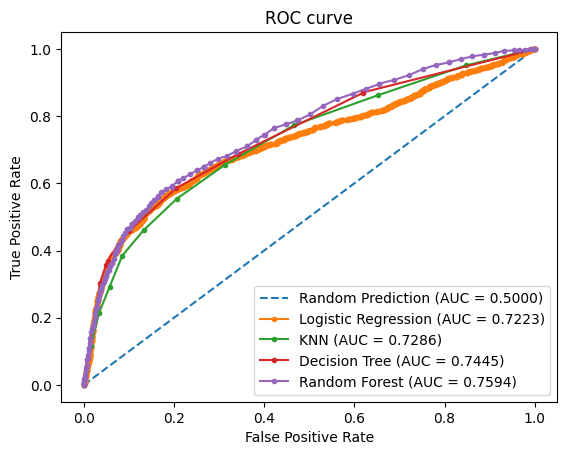

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# AUC line for Random prediction
ns_prob=[0 for _ in range(len(Y_test))]
ns_fpr,ns_tpr,_=roc_curve(Y_test,ns_prob)

ns_auc=roc_auc_score(Y_test, ns_prob)

# AUC for Logistic regression
lr_prob=log_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
lr_auc=roc_auc_score(Y_test,lr_prob)

lr_fpr,lr_tpr,_=roc_curve(Y_test,lr_prob)

# AUC for KNN
knn_prob=knn_model.predict_proba(X_test)
knn_prob=knn_prob[:, 1]
knn_fpr,knn_tpr,_=roc_curve(Y_test,knn_prob)

knn_auc=roc_auc_score(Y_test,knn_prob)


# AUC for Decision Tree
pred_dt=pred.predict_proba(X_test)
pred_dt=pred_dt[:, 1]
dt_fpr,dt_tpr,_=roc_curve(Y_test,pred_dt)

dt_auc=roc_auc_score(Y_test,pred_dt)

# AUC for Random Forest
pred_rf=rf_classifier.predict_proba(X_test)
pred_rf=pred_rf[:, 1]
rf_fpr,rf_tpr,_=roc_curve(Y_test,pred_rf)

rf_auc=roc_auc_score(Y_test,pred_rf)


# Plot the ROC curves
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction (AUC = %0.4f)' % ns_auc)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression (AUC = %0.4f)' % lr_auc)
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN (AUC = %0.4f)' % knn_auc)
plt.plot(dt_fpr,dt_tpr,marker='.',label='Decision Tree (AUC = %0.4f)' % dt_auc)
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest (AUC = %0.4f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Conclusion

Accuracy of logistic regression is among best, AUC in region of interest similar for most. Logistice regression is the most interpretable and applicable and tied for best accuracy so it will be used. It results in approximately 81% accuracy on individual level in predicting default, and 94% accurate on institution level at predicting total portfolio defaults amount. Odds ratios are computed above for parameter impact. See presentation for overview of methodology, results, and application.